In [74]:
import pandas as pd
import clustering_module as cm
import df_handler_module as dh
from urllib.parse import urlparse
from datetime import datetime  
from datetime import timedelta 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
sql_list = {'regs_total':{'src_server':3, 'src_table': "Raw.tmp.DataScienceFraudRegs"} , 
            'sessions_by_day': {'src_server':3, 'src_table': "Raw.tmp.DataScienceSessions_ByDay"} , 
            'suspends_by_day': {'src_server':1, 'src_table':  "StatDB.tmp.DataScience_Suspends_ByDay"} , 
            'transactions_by_day': {'src_server':1, 'src_table': "StatDB.tmp.DataScience_Transactions_ByDay"} ,
            'purchases_by_day': {'src_server':1, 'src_table': "StatDB.tmp.DataScience_Purchases_ByDay"} ,
            'sessions_ip_by_day': {'src_server':3, 'src_table': "Raw.tmp.DataScienceSessionsIP_ByDay"} ,
            'notifications_by_day': {'src_server':3, 'src_table': "Raw.tmp.Notifications_ByDay"} ,
            'ga_actions_by_day': {'src_server':3, 'src_table': "Raw.tmp.GAActions_ByDay"} 
           }   


In [97]:
#init dataframes
regs_handler = dh.DataFrameHandler(sql_list = sql_list)

#rename columns
regs_handler.rename_columns({"Event_Date": "Date", "Presence_Date": "Date"})
columns_data = ['RegDateTime', 'RegDate', 'Date']
columns_numeric =  ["hasClick", 
                    "hasOpen", 
                    "isSuspend", 
                    "isScam", 
                    "hasIpDiffPrev", 
                    "hasClick",
                    "isNewIP",
                    "hasOpen",
                    "isVip",
                    "isFraud"
                   ]
regs_handler.convert_columns({'datetime':columns_data, 'numeric':columns_numeric})  

read dataframe regs_total from Raw.tmp.DataScienceFraudRegsql table
SELECT * FROM Raw.tmp.DataScienceFraudRegs
read dataframe sessions_by_day from Raw.tmp.DataScienceSessions_ByDayql table
SELECT * FROM Raw.tmp.DataScienceSessions_ByDay
read dataframe suspends_by_day from StatDB.tmp.DataScience_Suspends_ByDayql table
SELECT * FROM StatDB.tmp.DataScience_Suspends_ByDay
read dataframe transactions_by_day from StatDB.tmp.DataScience_Transactions_ByDayql table
SELECT * FROM StatDB.tmp.DataScience_Transactions_ByDay
read dataframe purchases_by_day from StatDB.tmp.DataScience_Purchases_ByDayql table
SELECT * FROM StatDB.tmp.DataScience_Purchases_ByDay
read dataframe sessions_ip_by_day from Raw.tmp.DataScienceSessionsIP_ByDayql table
SELECT * FROM Raw.tmp.DataScienceSessionsIP_ByDay
read dataframe notifications_by_day from Raw.tmp.Notifications_ByDayql table
SELECT * FROM Raw.tmp.Notifications_ByDay
read dataframe ga_actions_by_day from Raw.tmp.GAActions_ByDayql table
SELECT * FROM Raw.tmp.GA

In [98]:
regs_handler.merge_add_from(type_merge="inner", merge_columns = ["RegID"], add_columns = ["RegID", "RegDate"], key_merge = 'regs_total') #add regdatefrom regd
regs_handler.set_date_diff(column_from = 'RegDate', column_to = 'Date') #set datediff after reg

In [100]:
#create common table
regs_handler.merge_multiple(drop_columns = ['Date','RegDate'], type_merge = "outer", merge_columns = ["RegID", "Day_Diff"])

In [88]:
regs_handler.result_dataset_total.head(100).transpose()

0  \
regid                                                              8.4358e+08   
session_duration                                                         7459   
session_count                                                               1   
day_diff                                                                    0   
became_suspend                                                            NaN   
became_scam                                                               NaN   
transactions_error                                                        NaN   
transactions_success                                                      NaN   
haserrortransaction                                                       NaN   
hassuccestransaction                                                      NaN   
qty_subscription                                                          NaN   
qty_tokens                                                                NaN   
qty_ios                                                                   NaN   
qty_android                                                               NaN   
qty_paypal                                                                NaN   
qty_others                                                                NaN   
qty_all                                                                   NaN   
countips                                                                    1   
countcountries                                                              1   
isnewip                                                                     1   
notification_click                                                        NaN   
notification_open                                                         NaN   
count_click                                                               NaN   
count_open                                                                NaN   
start_fill                                                                NaN   
checkout_open                                                             NaN   
chat_request                                                              NaN   
checkout_ready                                                            NaN   
replay_popup                                                              NaN   
contacts_click                                                            NaN   
click_photo                                                               NaN   
submit_invalid                                                            NaN   
search_button                                                             NaN   
submit_error                                                              NaN   
click_resend                                                              NaN   
help_desk_article_open                                                    NaN   
help_desk_let_us_know_open                                                NaN   
regdate_x                                                                 NaT   
rpid                                                                        3   
sourceid                                                                    2   
userid                                                            3.10671e+11   
regdatetime                                        2019-05-20 00:00:17.413333   
regdate_y                                                 2019-05-20 00:00:00   
isvip                                                                       0   
isfraud                                                                     0   
haspurchase                                                                 0   
logindateto                                        2019-06-03 00:00:17.413333   
isconfirmed                                                                 0   
domain                                                              gmail.com   
name                      

In [101]:
columns_rename = {"hasClick": "notification_click", 
                  "hasOpen": "notification_open", 
                  "Errors": "transactions_error", 
                  "Successes": "transactions_success", 
                  "DurationClear_sec": "session_duration", 
                  "Sessions_cnt": "session_count", 
                  "isSuspend": "became_suspend",
                  'regdate_x':'regdate',
                  "isScam": "became_scam"} 
regs_handler.rename_columns(columns_rename, type = 1)

In [127]:
regs_handler.result_dataset_total["session_avg"] = regs_handler.result_dataset_total["session_duration"] / regs_handler.result_dataset_total["session_count"]
#regs_handler.result_dataset_total["hasDescription"] = regs_handler.result_dataset_total["Description"].apply(lambda x: 0 if x == None or x == '' else 1)
regs_handler.result_dataset_total["referrer"] = regs_handler.result_dataset_total["referrer"].apply(lambda x: str(x).split("//")[-1].split("/")[0].split('?')[0].replace('www.',''))  

In [128]:
regs_handler.result_dataset_total['regdate'] = regs_handler.result_dataset_total['regdate_y'].apply(lambda x: str(x.strftime("%Y%m%d")))

In [129]:
del_columns= ['education',
              'weight',
              'ip',
              'userid',
              'acquisitionid',
              'regdate_x',
              'regdate_y',
              'ipreg',
              'regdatetime',
              'logindateto',
              ]
regs_handler.delete_columns(del_columns) 

In [130]:
pd.options.display.max_rows= 100
regs_handler.result_dataset_total.describe(include=['object', 'bool', 'datetime', 'float', 'int']).transpose()

count unique                          top  \
regid                       268512    NaN                          NaN   
session_duration            266929    NaN                          NaN   
session_count               266929    NaN                          NaN   
day_diff                    268512    NaN                          NaN   
became_suspend                3520    NaN                          NaN   
became_scam                   3520    NaN                          NaN   
transactions_error            2562    NaN                          NaN   
transactions_success          2562    NaN                          NaN   
haserrortransaction           2562    NaN                          NaN   
hassuccestransaction          2562    NaN                          NaN   
qty_subscription              1378    NaN                          NaN   
qty_tokens                    1378    NaN                          NaN   
qty_ios                       1378    NaN                          NaN   
qty_android                   1378    NaN                          NaN   
qty_paypal                    1378    NaN                          NaN   
qty_others                    1378    NaN                          NaN   
qty_all                       1378    NaN                          NaN   
countips                    266929    NaN                          NaN   
countcountries              266929    NaN                          NaN   
isnewip                     266929    NaN                          NaN   
notification_click           91552    NaN                          NaN   
notification_open            91552    NaN                          NaN   
count_click                  91552    NaN                          NaN   
count_open                   91552    NaN                          NaN   
start_fill                   61203    NaN                          NaN   
checkout_open                61203    NaN                          NaN   
chat_request                 61203    NaN                          NaN   
checkout_ready               61203    NaN                          NaN   
replay_popup                 61203    NaN                          NaN   
contacts_click               61203    NaN                          NaN   
click_photo                  61203    NaN                          NaN   
submit_invalid               61203    NaN                          NaN   
search_button                61203    NaN                          NaN   
submit_error                 61203    NaN                          NaN   
click_resend                 61203    NaN                          NaN   
help_desk_article_open       61203    NaN                          NaN   
help_desk_let_us_know_open   61203    NaN                          NaN   
hasgaevent                   61203    NaN                          NaN   
rpid                        268512    NaN                          NaN   
sourceid                    268512    NaN                          NaN   
isvip                       268512    NaN                          NaN   
isfraud                     268512    NaN                          NaN   
haspurchase                 268512    NaN                          NaN   
isconfirmed                 268512    NaN                          NaN   
domain                      268512   1342                    gmail.com   
name                        265941  63750                    Anonymous   
gender                      259040      3                          mal   
age                         249193    NaN                          NaN   
city                        262351  12685                                
countrynameprofile          214733    195                           US   
countrynamebyip             265483    190     United States of America   
afidtype                    268507      1                        Media   
stagename                   268507     42           appsf_Facebook Ads   
campaign                    26850

In [131]:
regs_handler.result_dataset_total[['regid', 'day_diff', 'regdate', 'rpid']] .groupby(['day_diff', 'rpid']).agg({'regdate':['count','nunique']})

regdate        
                count nunique
day_diff rpid                
0        3      76838      11
         9         98      11
         10      1096      11
         11        37      11
         15     11343      11
         17       803      11
         18      3557      11
         20         8       4
         22      1739      11
         23         1       1
         24       196      11
         25        10       3
         28         1       1
         121      849      11
1        3      29099      11
         9         16       9
         10       156      11
         11        19       9
         15      2911      11
         17       163      11
         18       979      11
         20         1       1
         22       170      11
         24        20      10
         25         1       1
         121      259      11
2        3      21986      11
         9          7       3
         10       118      11
         11        13       7
         15      1940      11
         17       110      11
         18       579      11
         20         1       1
         22       105      11
         24        13       7
         121      162      11
3        3      15280      11
         9          6       5
         10        66      11
         11         8       6
         15      1310      11
         17        60       9
         18       401      11
         20         1       1
         22        61      11
         24         4       4
         121      118      11
4        3      12146      11
         9          8       5
...               ...     ...
10       3       6779      11
         9          3       3
         10        26      10
         11         4       4
         15       456      11
         17        17       8
         18       117      11
         22        25      10
         24         4       4
         121       42      10
11       3       6424      11
         9          4       3
         10        26       9
         11         7       6
         15       425      11
         17        13       6
         18        98      11
         22        23      10
         24         3       3
         121       46      10
12       3       6121      11
         9          4       2
         10        18       8
         11         2       1
         15       404      11
         17        12       7
         18       106      11
         22        31      10
         24         3       3
         121       47      10
13       3       5916      11
         9          2       2
         10        20      11
         11         3       2
         15       375      11
         17        15       8
         18        91      11
         22        27      10
         24         4       4
         121       44      11
14       3       5635      11
         9          3       3
         10        20      10
         11         2       2
         15       379      11
         17        13       7
         18        82      11
         22        22       9
         24         2       2
         121       47      10

[164 rows x 2 columns]

In [132]:
regs_handler.result_dataset_total[regs_handler.result_dataset_total['regid'] == 849259411].transpose()

255355       255356       255357  \
regid                       8.49259e+08  8.49259e+08  8.49259e+08   
session_duration                    276         2730          317   
session_count                         1            2            1   
day_diff                              0            4            5   
became_suspend                      NaN          NaN          NaN   
became_scam                         NaN          NaN          NaN   
transactions_error                  NaN          NaN          NaN   
transactions_success                NaN          NaN          NaN   
haserrortransaction                 NaN          NaN          NaN   
hassuccestransaction                NaN          NaN          NaN   
qty_subscription                    NaN          NaN          NaN   
qty_tokens                          NaN          NaN          NaN   
qty_ios                             NaN          NaN          NaN   
qty_android                         NaN          NaN          NaN   
qty_paypal                          NaN          NaN          NaN   
qty_others                          NaN          NaN          NaN   
qty_all                             NaN          NaN          NaN   
countips                              1            2            2   
countcountries                        1            2            2   
isnewip                               1            1            0   
notification_click                  NaN            1          NaN   
notification_open                   NaN            1          NaN   
count_click                         NaN            1          NaN   
count_open                          NaN            1          NaN   
start_fill                            4            1            0   
checkout_open                         1            0            0   
chat_request                          0            2            1   
checkout_ready                        1            0            0   
replay_popup                          0            0            1   
contacts_click                        0            0            0   
click_photo                           0            2            0   
submit_invalid                        0            0            0   
search_button                         0            0            0   
submit_error                          0            0            0   
click_resend                          0            0            0   
help_desk_article_open                0            0            0   
help_desk_let_us_know_open            0            0            0   
hasgaevent                            1            1            1   
rpid                                  3            3            3   
sourceid                              0            0            0   
isvip                                 0            0            0   
isfraud                               0            0            0   
haspurchase                           0            0            0   
isconfirmed                           1            1            1   
domain                            ya.ru        ya.ru        ya.ru   
name                             Donlad       Donlad       Donlad   
gender                              mal          mal          mal   
age                                  28           28           28   
city                          Amsterdam    Amsterdam    Amsterdam   
countrynameprofile                   NL           NL           NL   
countrynamebyip             Netherlands  Netherlands  Netherlands   
afidtype                           None         None         None   
stagename                          None         None         None   
campaign                           None         None         None   
advgroup                           None         None         None   
afid                                NaN          NaN          NaN   
hascountrydifference                  0            0            0   
hasthumbnail                   

In [105]:
regs_handler.result_dataset_total.dtypes

regid                                float64
session_duration                     float64
session_count                        float64
day_diff                               int64
became_suspend                       float64
became_scam                          float64
transactions_error                   float64
transactions_success                 float64
haserrortransaction                  float64
hassuccestransaction                 float64
qty_subscription                     float64
qty_tokens                           float64
qty_ios                              float64
qty_android                          float64
qty_paypal                           float64
qty_others                           float64
qty_all                              float64
countips                             float64
countcountries                       float64
isnewip                              float64
notification_click                   float64
notification_open                    float64
count_clic

In [133]:
regs_handler.result_dataset_total[regs_handler.result_dataset_total["regid"] == 849259411].transpose()

255355       255356       255357  \
regid                       8.49259e+08  8.49259e+08  8.49259e+08   
session_duration                    276         2730          317   
session_count                         1            2            1   
day_diff                              0            4            5   
became_suspend                      NaN          NaN          NaN   
became_scam                         NaN          NaN          NaN   
transactions_error                  NaN          NaN          NaN   
transactions_success                NaN          NaN          NaN   
haserrortransaction                 NaN          NaN          NaN   
hassuccestransaction                NaN          NaN          NaN   
qty_subscription                    NaN          NaN          NaN   
qty_tokens                          NaN          NaN          NaN   
qty_ios                             NaN          NaN          NaN   
qty_android                         NaN          NaN          NaN   
qty_paypal                          NaN          NaN          NaN   
qty_others                          NaN          NaN          NaN   
qty_all                             NaN          NaN          NaN   
countips                              1            2            2   
countcountries                        1            2            2   
isnewip                               1            1            0   
notification_click                  NaN            1          NaN   
notification_open                   NaN            1          NaN   
count_click                         NaN            1          NaN   
count_open                          NaN            1          NaN   
start_fill                            4            1            0   
checkout_open                         1            0            0   
chat_request                          0            2            1   
checkout_ready                        1            0            0   
replay_popup                          0            0            1   
contacts_click                        0            0            0   
click_photo                           0            2            0   
submit_invalid                        0            0            0   
search_button                         0            0            0   
submit_error                          0            0            0   
click_resend                          0            0            0   
help_desk_article_open                0            0            0   
help_desk_let_us_know_open            0            0            0   
hasgaevent                            1            1            1   
rpid                                  3            3            3   
sourceid                              0            0            0   
isvip                                 0            0            0   
isfraud                               0            0            0   
haspurchase                           0            0            0   
isconfirmed                           1            1            1   
domain                            ya.ru        ya.ru        ya.ru   
name                             Donlad       Donlad       Donlad   
gender                              mal          mal          mal   
age                                  28           28           28   
city                          Amsterdam    Amsterdam    Amsterdam   
countrynameprofile                   NL           NL           NL   
countrynamebyip             Netherlands  Netherlands  Netherlands   
afidtype                           None         None         None   
stagename                          None         None         None   
campaign                           None         None         None   
advgroup                           None         None         None   
afid                                NaN          NaN          NaN   
hascountrydifference                  0            0            0   
hasthumbnail                   

No labels provided. Feature importance based methods are not available.
14 features with a correlation magnitude greater than 0.50.



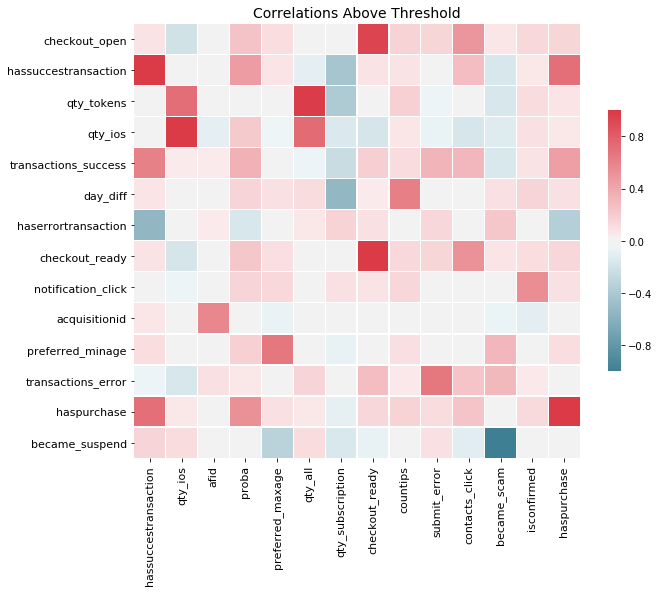

In [107]:
from feature_selector import FeatureSelector
fs = FeatureSelector(data = regs_handler.result_dataset_total)
fs.identify_collinear(correlation_threshold = 0.5)
fs.plot_collinear()

In [ ]:
regdates = regs_handler.result_dataset_total["regdate"].unique()
rpids = regs_handler.result_dataset_total["rpid"].unique()

for type_dim_reduction in range(0,2):
    for tn in range(0,4):
        for rpid in rpids:
                for regdate in regdates: 
                    for day in range(0,14):
                        cur_data_frame = regs_handler.result_dataset_total[regs_handler.result_dataset_total['day_diff'] == day][regs_handler.result_dataset_total['rpid'] == 3][regs_handler.result_dataset_total['regdate'] == '20190530']
                        clust = cm.clustering(cur_day = day, type_clustering = 0, type_dim_reduction = type_dim_reduction, count_clusters = 15, input_dataframe = cur_data_frame, type_normalize = tn, data_reg = regdate,  rpid = rpid)
                        del_columns= ['regid', 'day_diff']
                        column_levels = [x for x in cur_data_frame.columns if x not in del_columns]
                        clust.get_cluster_number(del_columns, column_levels)
                        clust.start_clustering(del_columns, column_levels)

In [ ]:
regdates = regs_handler.result_dataset_total["regdate"].unique()
rpids = regs_handler.result_dataset_total["rpid"].unique()

for day in range(0,14):
    #clust.get_cluster_number(del_columns, column_levels)
    #continue
    for tn in range(0,2):
        print(tn)
        cur_data_frame = regs_handler.result_dataset_total[regs_handler.result_dataset_total['day_diff'] == day][regs_handler.result_dataset_total['rpid'] == 3][regs_handler.result_dataset_total['regdate'] == '20190530']
        clust = cm.clustering(cur_day = day, type_clustering = 0, type_dim_reduction = 0, count_clusters = 15, input_dataframe = cur_data_frame, type_normalize = tn)
        del_columns= ['regid', 'day_diff']
        column_levels = ['rpid', 
                     'cluster_number',
                     'notification_click', 
                     'notification_open', 
                     'hasipdiffprev', 
                     'hasipdiffreg',
                     'hasthumbnail',  
                     'afidtype', 
                     'gender',
                     'isconfirmed',
                     'became_suspend',  
                     'sourceid', 
                     'hasdescription',
                     'has_transactions_error', 
                     'has_transactions_success ',
                     'became_suspend', 
                     'became_scam']
        print(clust.get_image_path(section='optimal_cluster'))
        clust.get_cluster_number(del_columns, column_levels)
        

In [135]:
regdates = regs_handler.result_dataset_total["regdate"].unique()


['20190520' '20190521' '20190522' '20190523' '20190524' '20190525'
 '20190526' '20190527' '20190528' '20190529' '20190530']


In [138]:
rpids = regs_handler.result_dataset_total["rpid"].unique()

array([  3,  15,   9,  10,  24,  18,  22, 121,  11,  17,  23,  20,  25,
        28])

In [ ]:
 column_levels = ['rpid', 
                     'cluster_number',
                     'notification_click', 
                     'notification_open', 
                     'hasipdiffprev', 
                     'hasipdiffreg',
                     'hasthumbnail',  
                     'afidtype', 
                     'gender',
                     'isconfirmed',
                     'became_suspend',  
                     'sourceid', 
                     'hasdescription',
                     'has_transactions_error', 
                     'has_transactions_success ',
                     'became_suspend', 
                     'became_scam']

In [42]:
cur_data_frame = regs_handler.result_dataset_total[regs_handler.result_dataset_total['day_diff'] == 0][regs_handler.result_dataset_total['rpid'] == 15]
clust = cm.clustering(cur_day = day, type_clustering = 0, type_dim_reduction = 0, type_normalize = 0, count_clusters = 3, input_dataframe = cur_data_frame)
clust.get_cluster_number(del_columns, column_levels)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


count clusters 1
count clusters 2
count clusters 3
count clusters 4
count clusters 5
count clusters 6
count clusters 7
count clusters 8
count clusters 9
count clusters 10
count clusters 11
count clusters 12
count clusters 13
count clusters 14
count clusters 15
count clusters 16
count clusters 17
count clusters 18
count clusters 19


<Figure size 576x360 with 0 Axes>

In [134]:
print(len(clust.normalize_df["sourceid"].unique()))

4


In [125]:
print(clust.input_dataframe[['regid', "cluster_number"]].groupby("cluster_number").count().transpose())

cluster_number  0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
regid           89  51  29   2  63   7  83  49   1  19  95   4  37  33   2


In [ ]:
from feature_selector import FeatureSelector
 
# Признаки - в train, метки - в train_labels
fs = FeatureSelector(data = clust.normalize_df)
fs.identify_missing(missing_threshold = 0.3)
fs.identify_collinear(correlation_threshold = 0.9)
fs.plot_collinear()
fs.identify_single_unique()
fs.plot_unique()